# Import the necessary libraries

In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

# Load the build in Datasets

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Audio : [-3.1496835e-05  4.5770039e-06  6.3310695e-06 ... -1.1488050e-05
 -7.4060167e-06 -8.0729505e-06]
Sampling Rate : 22050


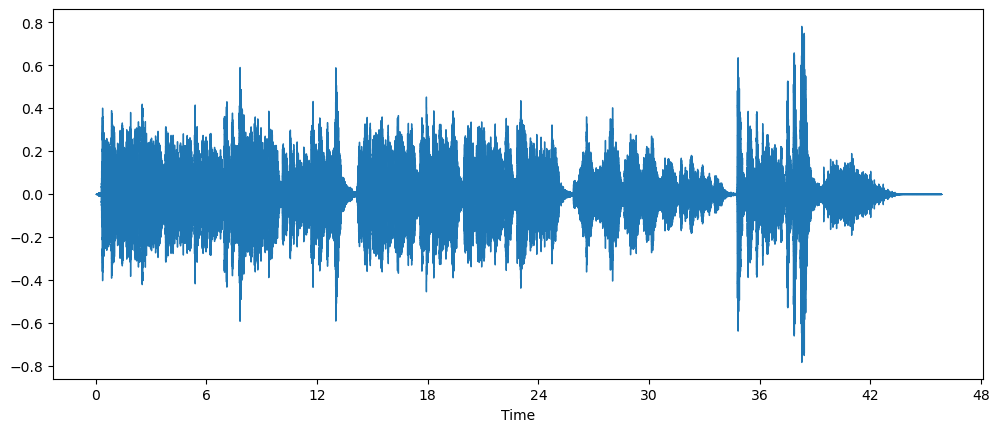

In [2]:
audio_array, sampling_rate = librosa.load(librosa.ex("brahms"))
print('Audio :', audio_array)
print('Sampling Rate :',sampling_rate)

plt.figure().set_figwidth(12)
librosa.display.waveshow(audio_array, sr=sampling_rate)
plt.show()

# Listen the audio files

In [3]:
from IPython.display import Audio as aud

aud(audio_array, rate=16_000)

# Mel spectrogram of an audio signal
It takes several parameters:
* y: The audio signal array.
* sr: The sampling rate of the audio signal.
* n_mels: The number of Mel frequency bins to generate in the spectrogram.
* fmax: The highest frequency (in Hz) to include in the spectrogram. Frequencies above this value will be discarded.

The `librosa.power_to_db` function converts a power spectrogram (like the Mel spectrogram) to decibels (dB) scale. It takes the spectrogram as input and computes the logarithm of the magnitudes with a reference point. In this case, ref=np.max scales the logarithmic values with respect to the maximum value in the input spectrogram.

In [4]:
# Mel spectrogram of an audio signal
spectrogram = librosa.feature.melspectrogram(y=audio_array, sr=sampling_rate,
                                   n_mels=128, fmax=8_000)

# converts a power spectrogram S to decibels (dB) scale
decibels_scale = librosa.power_to_db(spectrogram, ref=np.max)
decibels_scale

array([[-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       ...,
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.]], dtype=float32)

## Display Spectrogram: 
The librosa.display.specshow function displays a spectrogram. It takes several parameters:
* decibels_scale: The Mel spectrogram in decibels.
* x_axis: The axis representing time ("time" in this case).
* y_axis: The axis representing frequency ("mel" in this case, which represents the Mel frequency scale).
* sr: The sampling rate.
* fmax: The maximum frequency to display.

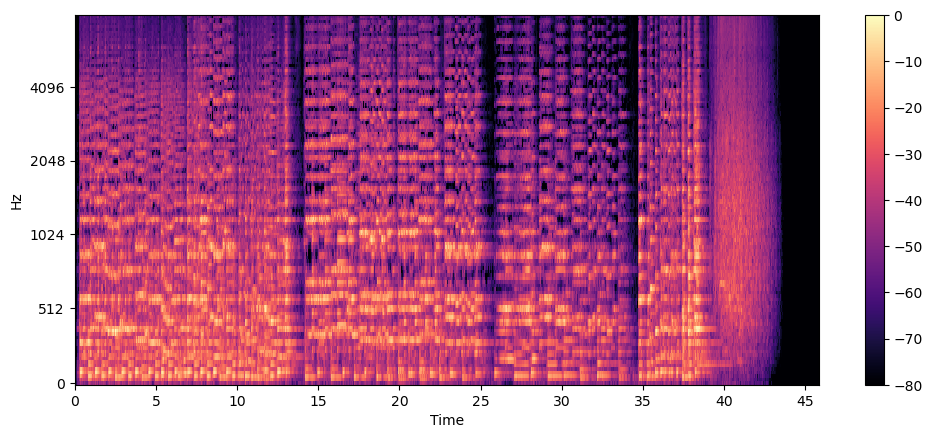

In [5]:
# Mel spectrogram of an audio signal
spectrogram = librosa.feature.melspectrogram(y=audio_array, sr=sampling_rate,
                                   n_mels=128, fmax=8_000)
# converts a power spectrogram S to decibels (dB) scale
decibels_scale = librosa.power_to_db(spectrogram, ref=np.max)

plt.figure().set_figwidth(12)

librosa.display.specshow(decibels_scale, 
                         x_axis="time", y_axis="mel", 
                         sr=sampling_rate,
                         fmax=8000)

plt.colorbar()
plt.show()

# Load Dataset

In [6]:
from datasets import load_dataset, Audio

minds = load_dataset("PolyAI/minds14", name="en-US",
                     split="train")
# Cast Audio Column
minds = minds.cast_column("audio", Audio(sampling_rate=16_000))
minds

Generating train split: 0 examples [00:00, ? examples/s]

Dataset minds14 downloaded and prepared to /root/.cache/huggingface/datasets/PolyAI___minds14/en-US/1.0.0/65c7e0f3be79e18a6ffaf879a083daf706312d421ac90d25718459cbf3c42696. Subsequent calls will reuse this data.


Dataset({
    features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
    num_rows: 563
})

# Check the first data rows

In [7]:
example = minds[0]
example

{'path': '/root/.cache/huggingface/datasets/downloads/extracted/a19fbc5032eacf25eab0097832db7b7f022b42104fbad6bd5765527704a428b9/en-US~JOINT_ACCOUNT/602ba55abb1e6d0fbce92065.wav',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/a19fbc5032eacf25eab0097832db7b7f022b42104fbad6bd5765527704a428b9/en-US~JOINT_ACCOUNT/602ba55abb1e6d0fbce92065.wav',
  'array': array([ 1.7056242e-05,  2.1872745e-04,  2.2809987e-04, ...,
          3.4384240e-05, -5.9636477e-06, -1.7684666e-05], dtype=float32),
  'sampling_rate': 16000},
 'transcription': 'I would like to set up a joint account with my partner',
 'english_transcription': 'I would like to set up a joint account with my partner',
 'intent_class': 11,
 'lang_id': 4}

# Listen the audio files

In [8]:
from IPython.display import Audio as aud

aud(example["audio"]["array"], rate=16_000)

# ASR (Automatic Speech Recognition) Transformer

In [9]:
from transformers import pipeline

asr = pipeline("automatic-speech-recognition",
               model="facebook/wav2vec2-base-960h")

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Transcription

In [10]:
# example is one example from the dataset
audio_array = example["audio"]["path"]
transcription = asr(audio_array)
print(transcription)

{'text': 'I WOULD LIKE TO SET UP A JOINT ACCOUNT WITH MY PARTNER HOW DO I PROCEED WITH DOING THAT'}


## Examples

In [11]:
# Generates a random integer between 0 (inclusive) and minds.num_rows(exclusive)
index = np.random.randint(low=1, high=minds.num_rows)

# Access the files
example = minds[index]
# Audio patha
audio_path = example["audio"]["path"]
pred_transcription = asr(audio_path)
print(pred_transcription)

# Audio array
audio_array = example["audio"]["array"]
aud(example["audio"]["array"], rate=16_000)

{'text': 'WHERE CAN I WANT TO WHERE CAN I GO FOR ON A DEPOSIT CASH INTO MY ACCOUNT'}


In [12]:
# Generates a random integer between 0 (inclusive) and minds.num_rows(exclusive)
index = np.random.randint(low=1, high=minds.num_rows)

# Access the files
example = minds[index]
# Audio patha
audio_path = example["audio"]["path"]
pred_transcription = asr(audio_path)
print(pred_transcription)

# Audio array
audio_array = example["audio"]["array"]
aud(example["audio"]["array"], rate=16_000)

{'text': 'HELLO YES I WULD LIKE TO MAKE A PAYMEN OUT OF MY CHECKING ACCOUNT WHERE FOR OR ONE TWO THREE FOUR YES IN THE AMOUNT OF FIFTY DOURS YES OU QT ONE TWO THREE MAIN STREET THANK YOU OU QT THANK YOU SO MUCH FOR YOUR HELP'}


In [13]:
# Generates a random integer between 0 (inclusive) and minds.num_rows(exclusive)
index = np.random.randint(low=1, high=minds.num_rows)

# Access the files
example = minds[index]
# Audio patha
audio_path = example["audio"]["path"]
pred_transcription = asr(audio_path)
print(pred_transcription)

# Audio array
audio_array = example["audio"]["array"]
aud(example["audio"]["array"], rate=16_000)

{'text': 'HELLO I WAS RECALLING REGARD TO PROBLEMS I HAVE WITH MY CARD DOS NOT LETTING ME PAY FOR MY GROCERIES YOU KNOW WHAT THE PROBLEM IS'}


In [14]:
# Generates a random integer between 0 (inclusive) and minds.num_rows(exclusive)
index = np.random.randint(low=1, high=minds.num_rows)

# Access the files
example = minds[index]
# Audio patha
audio_path = example["audio"]["path"]
pred_transcription = asr(audio_path)
print(pred_transcription)

# Audio array
audio_array = example["audio"]["array"]
aud(example["audio"]["array"], rate=16_000)

{'text': "I WANT TO MAKE A LARGE PAYMENT ON MYN BUT I TE ONEY TO GE THE TEXT MESSAGE I'M NOT SURE WHAT I NEED TO DO"}


In [15]:
# Generates a random integer between 0 (inclusive) and minds.num_rows(exclusive)
index = np.random.randint(low=1, high=minds.num_rows)

# Access the files
example = minds[index]
# Audio patha
audio_path = example["audio"]["path"]
pred_transcription = asr(audio_path)
print(pred_transcription)

# Audio array
audio_array = example["audio"]["array"]
aud(example["audio"]["array"], rate=16_000)

{'text': "AI I JUST RECEIVE MY NEW CARD BUT I'M A BOUNT TO GO OVER SEAS ON VACATION AND I WANT TO KNOW IF I WE'N HAVE ANY TROUBLE USING IT THERE"}


In [16]:
# Generates a random integer between 0 (inclusive) and minds.num_rows(exclusive)
index = np.random.randint(low=1, high=minds.num_rows)

# Access the files
example = minds[index]
# Audio patha
audio_path = example["audio"]["path"]
pred_transcription = asr(audio_path)
print(pred_transcription)

# Audio array
audio_array = example["audio"]["array"]
aud(example["audio"]["array"], rate=16_000)

{'text': "AY I'VE LOST MY CARD AND SO I THINK I MIGHT KNOW WHERE IT IS BUT COULD YOU FREEZE OFER RIGHT NOW I I DON'T WANT ANY TRANSACTIONS TO HAPPEN ON IT UNTIL I CONFIND IT"}


In [17]:
example["transcription"]

"hi I've lost my card and so I think I might know where it is but could you freeze it for right now I don't want any transactions to happen on it until I can find it"